Install package pytorch_tabnet, commented after installation to avoid re-running. Uncomment in a new notebook runtime.

In [ ]:
# !pip install pytorch_tabnet

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from google.colab import drive 
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

Mount google drive storage.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Local imports using helper files**

In [ ]:
sys.path.append('/content/drive/MyDrive/MSc-project-lof/')

In [ ]:
from modelling import prepare_training, hparam_grid_search, train_test_result
from modelling import display_confusion_matrix, save_model

Load Training Data

In [ ]:
df_X = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_X_iter5_v1_transformed_ready to train.csv")

In [ ]:
df_y = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_y_iter5_v1_transformed_ready to train.csv")

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   col_0                                      8526 non-null   float64
 1   col_1                                      8526 non-null   float64
 2   col_2                                      8526 non-null   float64
 3   col_3                                      8526 non-null   float64
 4   col_4                                      8526 non-null   float64
 5   col_5                                      8526 non-null   float64
 6   col_6                                      8526 non-null   float64
 7   col_7                                      8526 non-null   float64
 8   Chromosome                                 8526 non-null   float64
 9   VEP Annotation                             8526 non-null   float64
 10  Allele Count            

In [ ]:
df_X['Chromosome'].nunique()

2923

In [ ]:
df_X['Chromosome'].value_counts()

10.000000    679
2.000000     668
8.000000     466
4.000000     351
20.000000    330
            ... 
19.122769      1
14.187699      1
2.852744       1
2.897622       1
16.669412      1
Name: Chromosome, Length: 2923, dtype: int64

Convert chromosome values to integers

In [ ]:
df_X['Chromosome'] = df_X['Chromosome'].apply(round)

In [ ]:
df_X['Chromosome'].nunique()

23

In [ ]:
df_X['Chromosome'].value_counts()

10    837
2     834
8     622
4     533
3     506
17    449
7     391
11    380
20    378
19    361
12    355
16    354
1     346
5     329
9     312
18    278
6     260
0     252
15    246
13    184
14    181
21     92
22     46
Name: Chromosome, dtype: int64

Prepare training data

In [ ]:
X_train, X_val, y_train, y_val = prepare_training(df_X, df_y)

In [ ]:
X_train.shape, y_train.shape

((5968, 47), (5968,))

In [ ]:
X_val.shape, y_val.shape

((2558, 47), (2558,))

In [ ]:
class_names = ['LikelyPatho','Pathogenic','Benign']

Lists to save validation accuracies and F1 scores  of the models.

In [ ]:
val_acc = []
f1_list = []

Logistic regression

Training Accuracy:  0.7250335120643432
Validation Accuracy:  0.7095387021110242
F1-Score: 0.7081236341259988


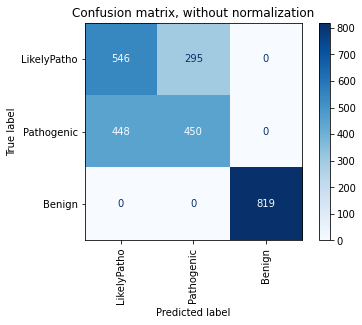

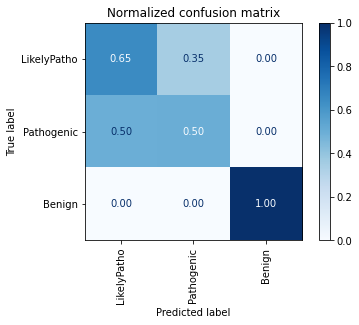

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       841
           1       0.60      0.50      0.55       898
           2       1.00      1.00      1.00       819

    accuracy                           0.71      2558
   macro avg       0.72      0.72      0.71      2558
weighted avg       0.71      0.71      0.71      2558



In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42,C=1e5,max_iter=20000)
acc, f1 = train_test_result(model_lr, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Hyperparameter tuning for Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
param_grid = [{"C":[1,10,100,1000],"gamma" : [0.1,0.01,0.001,0.00001],"kernel":["rbf"]}]
best_params = hparam_grid_search(svm.SVC(), param_grid, X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.778, total=   1.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.803, total=   1.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.753, total=   1.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.755, total=   1.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.769, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.733, total=   1.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.747, total=   1.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.709, total=   1.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.715, total=   1.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

SVM model

Training Accuracy:  0.9480563002680965
Validation Accuracy:  0.8272087568412823
F1-Score: 0.8272550495175078


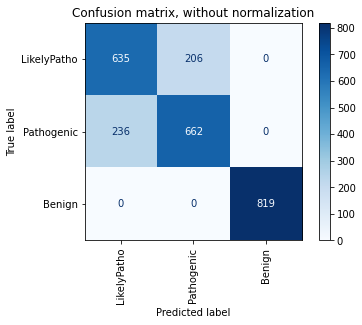

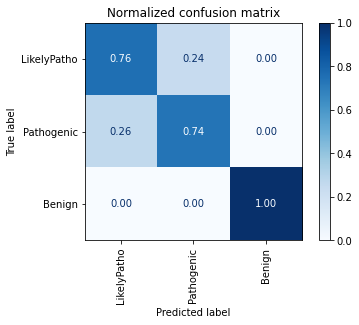

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       841
           1       0.76      0.74      0.75       898
           2       1.00      1.00      1.00       819

    accuracy                           0.83      2558
   macro avg       0.83      0.83      0.83      2558
weighted avg       0.83      0.83      0.83      2558



In [ ]:
model_svm = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True)
acc, f1 = train_test_result(model_svm, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

KNN Model

Training Accuracy:  0.840985254691689
Validation Accuracy:  0.7685691946833464
F1-Score: 0.7686313529399145


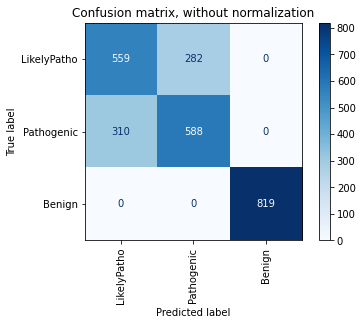

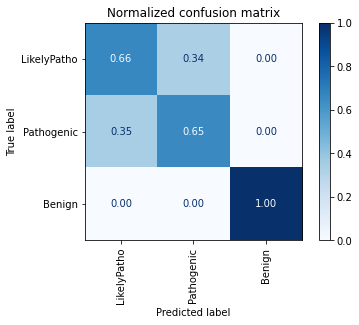

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       841
           1       0.68      0.65      0.67       898
           2       1.00      1.00      1.00       819

    accuracy                           0.77      2558
   macro avg       0.77      0.77      0.77      2558
weighted avg       0.77      0.77      0.77      2558



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=9)
acc, f1 = train_test_result(model_knn, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Gaussian Naive Bayes

Training Accuracy:  0.7000670241286864
Validation Accuracy:  0.6645817044566067
F1-Score: 0.6144072368126495


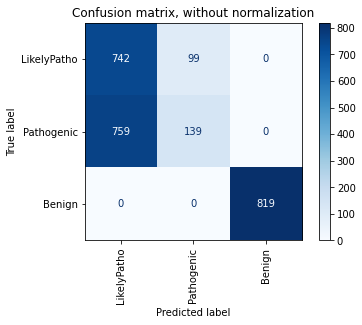

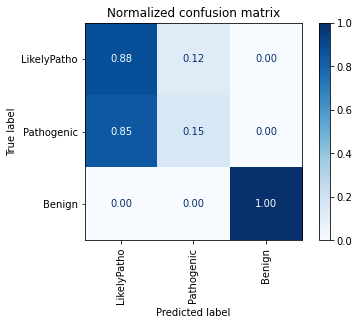

              precision    recall  f1-score   support

           0       0.49      0.88      0.63       841
           1       0.58      0.15      0.24       898
           2       1.00      1.00      1.00       819

    accuracy                           0.66      2558
   macro avg       0.69      0.68      0.63      2558
weighted avg       0.69      0.66      0.61      2558



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB(var_smoothing=0.00001)
acc, f1 = train_test_result(model_nb, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Random Forest Classifier

Training Accuracy:  1.0
Validation Accuracy:  0.9198592650508209
F1-Score: 0.9198804726362736


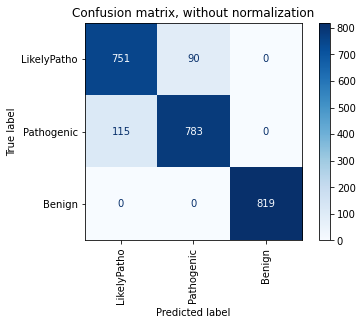

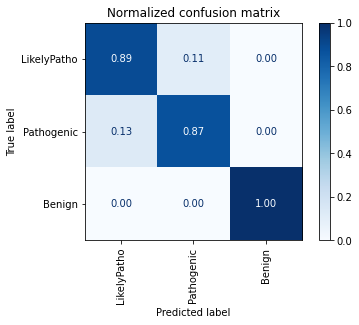

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       841
           1       0.90      0.87      0.88       898
           2       1.00      1.00      1.00       819

    accuracy                           0.92      2558
   macro avg       0.92      0.92      0.92      2558
weighted avg       0.92      0.92      0.92      2558



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=50, random_state=0,n_jobs=-1)
acc, f1 = train_test_result(model_rfc, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Hyper parameter tuning for XGB model. Code has been commneted to avoid re-running as it takes roughly 2 hours on Colab Pro with high RAM. Results have been saved after tuning.

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = [{ "max_depth": [30,50,60],
#                 "learning_rate": [0.1, 0.05,0.01],
#                 "gamma": [0.25,0.5, 1],
#                 "reg_lambda": [1,5,7,10],
#                 "scale_pos_weight": [1, 3, 5],
#                 "subsample": [0.7,0.9],
#                 "colsample_bytree": [0.5]
# }]

# xgb_grid = XGBClassifier(objective='multi:softmax',num_class=3)
# # xgb_grid = XGBClassifier()

# grid_xgb = GridSearchCV(xgb_grid,param_grid,refit=True,verbose=3,n_jobs=-1,scoring='roc_auc_ovr_weighted')
# grid_xgb.fit(X_train,y_train)
# print(grid_xgb.best_params_)

Results:


{'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 30, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 0.7}

In [ ]:
#Copying the resuls to best_params for re-iterations
best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 30, 'reg_lambda': 10, 'scale_pos_weight': 1, 'subsample': 0.7}
best_params

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 30,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.7}

XGB model using tuned hyper parameters.

Training Accuracy:  0.9344839142091153
Validation Accuracy:  0.8522283033620016
F1-Score: 0.8520104152230134


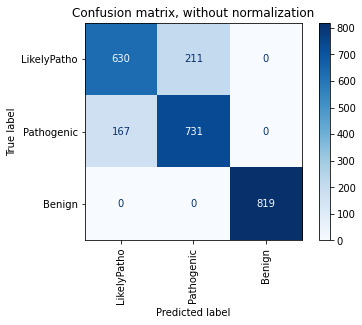

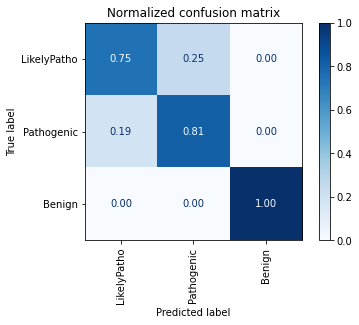

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       841
           1       0.78      0.81      0.79       898
           2       1.00      1.00      1.00       819

    accuracy                           0.85      2558
   macro avg       0.86      0.85      0.85      2558
weighted avg       0.85      0.85      0.85      2558



In [ ]:
model_xgb_tuned = XGBClassifier(
                    colsample_bytree=best_params['colsample_bytree'],
                    gamma = best_params['gamma'],
                    learning_rate = best_params['learning_rate'],
                    max_depth = best_params['max_depth'],
                    reg_lambda = best_params['reg_lambda'],
                    scale_pos_weight = best_params['scale_pos_weight'],
                    subsample = best_params['subsample'],
                    n_jobs = -1
                    )
acc, f1 = train_test_result(model_xgb_tuned, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Tab Net classfier based on deep learning architecture.

In [ ]:
model_tabnet = TabNetClassifier()
acc, f1 = train_test_result(model_tabnet, True, X_train, X_val, y_train, y_val, class_names)
val_acc.append(acc)
f1_list.append(f1)

Device used : cpu
epoch 0  | loss: 1.05789 | val_0_accuracy: 0.64738 |  0:00:00s
epoch 1  | loss: 0.69906 | val_0_accuracy: 0.6423  |  0:00:01s
epoch 2  | loss: 0.5412  | val_0_accuracy: 0.66732 |  0:00:01s
epoch 3  | loss: 0.49209 | val_0_accuracy: 0.68256 |  0:00:01s
epoch 4  | loss: 0.46962 | val_0_accuracy: 0.67553 |  0:00:02s
epoch 5  | loss: 0.45985 | val_0_accuracy: 0.65794 |  0:00:02s
epoch 6  | loss: 0.45951 | val_0_accuracy: 0.68217 |  0:00:03s
epoch 7  | loss: 0.45861 | val_0_accuracy: 0.66497 |  0:00:03s
epoch 8  | loss: 0.45552 | val_0_accuracy: 0.70524 |  0:00:04s
epoch 9  | loss: 0.45337 | val_0_accuracy: 0.69742 |  0:00:04s
epoch 10 | loss: 0.45635 | val_0_accuracy: 0.69859 |  0:00:05s
epoch 11 | loss: 0.455   | val_0_accuracy: 0.70876 |  0:00:05s
epoch 12 | loss: 0.45366 | val_0_accuracy: 0.65872 |  0:00:06s
epoch 13 | loss: 0.451   | val_0_accuracy: 0.71149 |  0:00:06s
epoch 14 | loss: 0.44977 | val_0_accuracy: 0.71384 |  0:00:07s
epoch 15 | loss: 0.44759 | val_0_accu

Plot comparison of validation accuracies and F1 scores.

<Figure size 432x288 with 0 Axes>

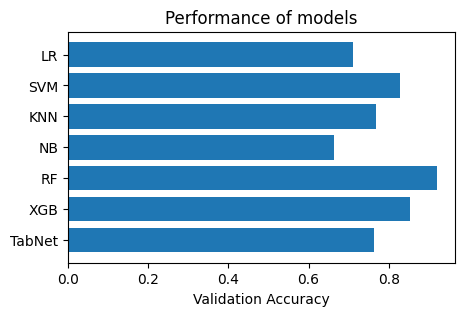

In [ ]:
plt.figure()
plt.rcdefaults()
fig, ax = plt.subplots()

models = ('LR', 'SVM', 'KNN', 'NB', "RF","XGB","TabNet")
y_pos = np.arange(len(models))

fig.set_size_inches(5,3)
ax.barh(y_pos, val_acc, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis() 
ax.set_xlabel('Validation Accuracy')
ax.set_title('Performance of models')

plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

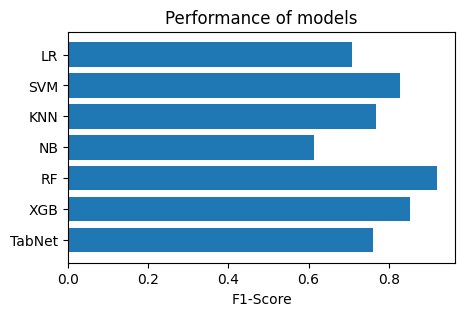

In [ ]:
plt.figure()
plt.rcdefaults()
fig, ax = plt.subplots()

models = ('LR', 'SVM', 'KNN', 'NB', "RF","XGB","TabNet")
y_pos = np.arange(len(models))

fig.set_size_inches(5,3)
ax.barh(y_pos, f1_list, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis() 
ax.set_xlabel('F1-Score')
ax.set_title('Performance of models')

plt.show()
plt.close()

Load Inpdependent Test Set (ITS)

In [ ]:
df_X_test = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_X_test_iter5_v1_transformed_ready to train.csv")
df_y_test = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_y_test_iter5_v1_transformed_ready to train.csv")

In [ ]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy().reshape(-1,)
X_test.shape, y_test.shape

((300, 47), (300,))

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

Before testing, train best models (XGB and RFC) on full training data (training set + testing set).

In [ ]:
X_full = np.concatenate((X_train,X_val),axis=0)

In [ ]:
X_full.shape

(8526, 47)

In [ ]:
y_full = np.concatenate((y_train,y_val),axis=0)
y.shape

(8526,)

Training Accuracy:  0.9468684025334272
F1-Score: 0.9468626772689457


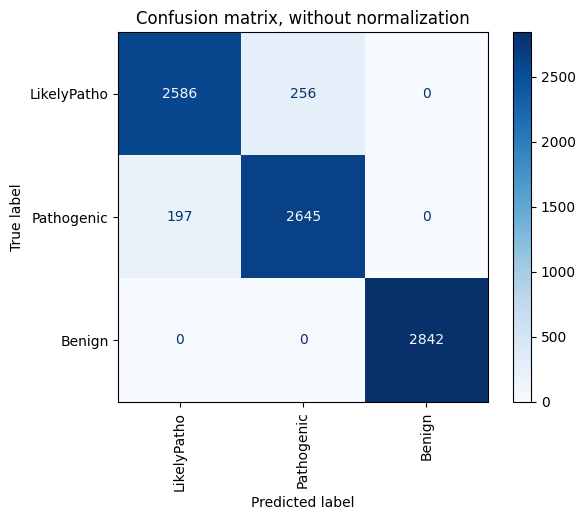

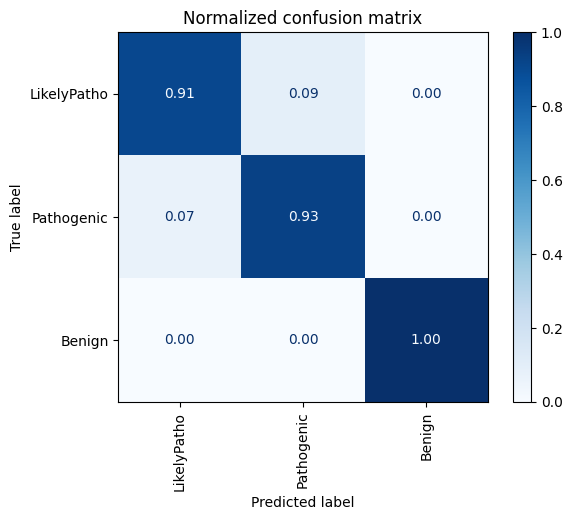

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2842
           1       0.91      0.93      0.92      2842
           2       1.00      1.00      1.00      2842

    accuracy                           0.95      8526
   macro avg       0.95      0.95      0.95      8526
weighted avg       0.95      0.95      0.95      8526



In [ ]:
model_xgb_full = XGBClassifier(
                    colsample_bytree=best_params['colsample_bytree'],
                    gamma = best_params['gamma'],
                    learning_rate = best_params['learning_rate'],
                    max_depth = best_params['max_depth'],
                    reg_lambda = best_params['reg_lambda'],
                    scale_pos_weight = best_params['scale_pos_weight'],
                    subsample = best_params['subsample'],
                    n_jobs = -1
                    )
train_test_result(model_xgb_full, train=True, X_train=X_full, y_train=y_full, class_names=class_names, train_f1=True, train_cm=True, test=False)

Test the XGB model using ITS.

Testing Accuracy:  0.17
F1-Score: 0.13098327759197326


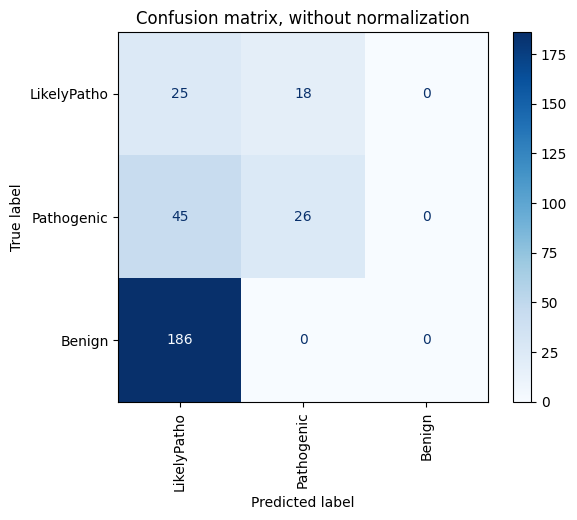

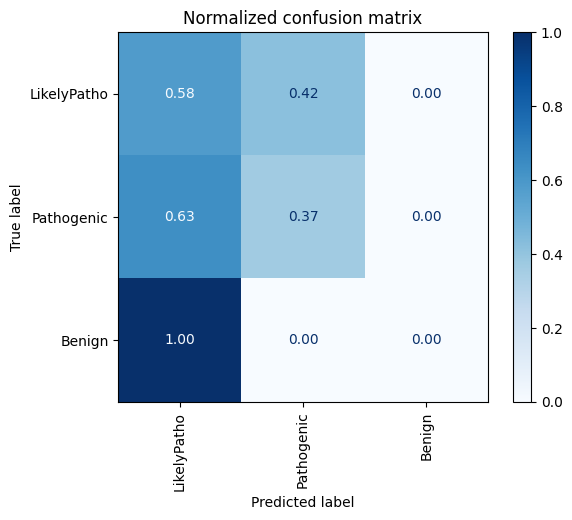

              precision    recall  f1-score   support

           0       0.10      0.58      0.17        43
           1       0.59      0.37      0.45        71
           2       0.00      0.00      0.00       186

    accuracy                           0.17       300
   macro avg       0.23      0.32      0.21       300
weighted avg       0.15      0.17      0.13       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_test_result(model_xgb_full,train=False, X_val=X_test, y_val=y_test, class_names=class_names, test=True, test_ret=False)

Train RFC on full data.

Training Accuracy:  0.9759558996012198
F1-Score: 0.9759554344557312


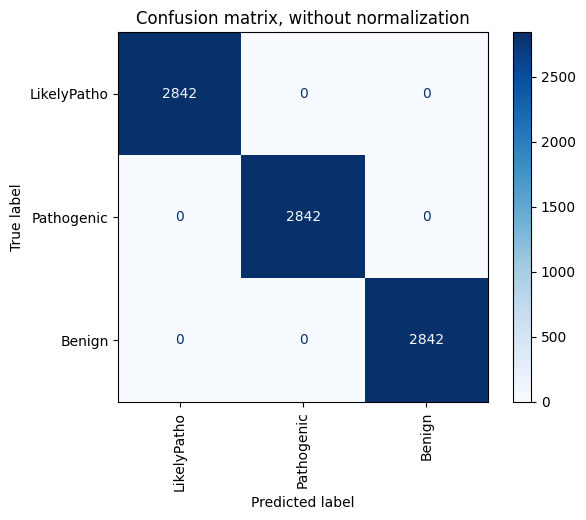

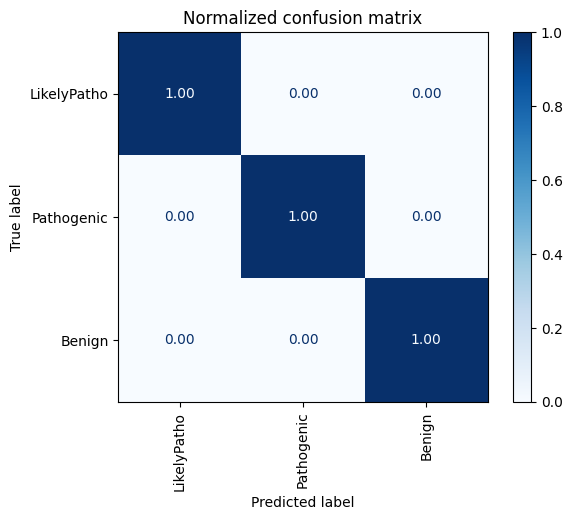

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2842
           1       0.97      0.96      0.96      2842
           2       1.00      1.00      1.00      2842

    accuracy                           0.98      8526
   macro avg       0.98      0.98      0.98      8526
weighted avg       0.98      0.98      0.98      8526



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc_full = RandomForestClassifier(n_estimators=30, random_state=0,n_jobs=-1)
train_test_result(model_rfc_full, train=True, X_train=X_full, y_train=y_full, class_names=class_names, train_f1=True, train_cm=True, test=False)

Test RFC on ITS.

Testing Accuracy:  0.20333333333333334
F1-Score: 0.12539688493970724


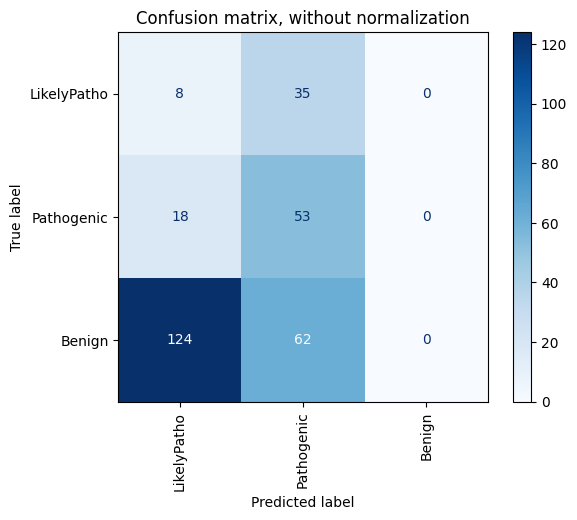

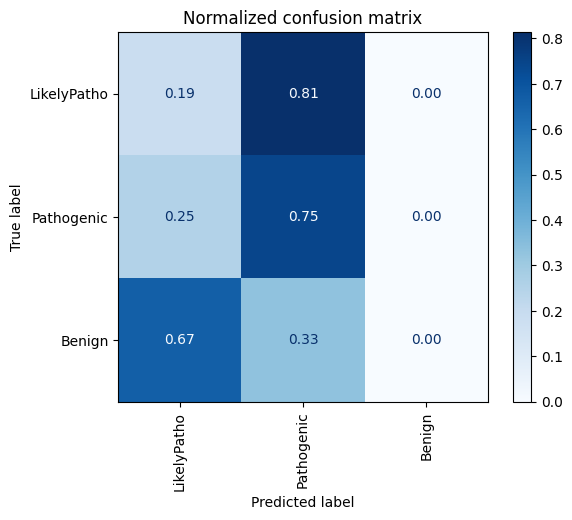

              precision    recall  f1-score   support

           0       0.05      0.19      0.08        43
           1       0.35      0.75      0.48        71
           2       0.00      0.00      0.00       186

    accuracy                           0.20       300
   macro avg       0.14      0.31      0.19       300
weighted avg       0.09      0.20      0.13       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_test_result(model_rfc_full,train=False, X_val=X_test, y_val=y_test, class_names=class_names, test=True, test_ret=False)